In [2]:
# Week 4 | Task 2 | Hassan Ali

# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [8]:
# Dataframe

df = pd.read_excel('mlr05.xls')
df.head()

,X1,X2,X3,X4,X5,X6
0,231.0,3.0,294,8.2,8.2,11
1,156.0,2.2,232,6.9,4.1,12
2,10.0,0.5,149,3.0,4.3,15
3,519.0,5.5,600,12.0,16.1,1
4,437.0,4.4,567,10.6,14.1,5


In [ ]:
# Determining correlation

print("Correlation coefficient between annual net sales and number of competitors: ", np.corrcoef(df.X1, df.X6)[0, 1])
print("Correlation coefficient between annual net sales and amount spend on advertising: ", np.corrcoef(df.X1, df.X4)[0, 1])

In [10]:
# Loads the All Greens Franchise dataset
df_all_greens = pd.read_excel('mlr05.xls')

# Displaying correlation of annual net sales with money spent on advertising and number of competitors
correlation_sales = df_all_greens[['X1', 'X4', 'X6']].corr().loc['X1', ['X4', 'X6']]
print("Correlation of annual net sales with money spent on advertising and number of competitors:")
print(correlation_sales)

Correlation of annual net sales with money spent on advertising and number of competitors:
X4    0.914024
X6   -0.912236
Name: X1, dtype: float64


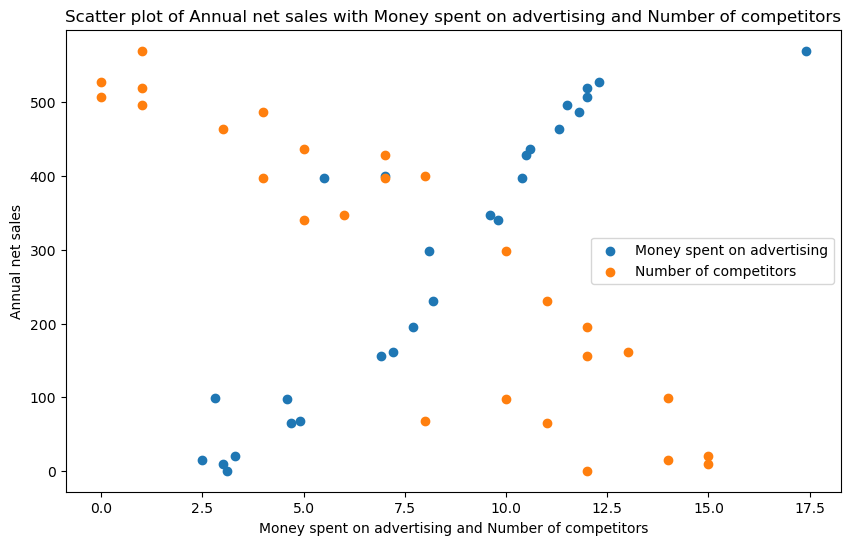

In [12]:
# Graphing the correlation on a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df_all_greens['X4'], df_all_greens['X1'], label='Money spent on advertising')
plt.scatter(df_all_greens['X6'], df_all_greens['X1'], label='Number of competitors')
plt.xlabel('Money spent on advertising and Number of competitors')
plt.ylabel('Annual net sales')
plt.title('Scatter plot of Annual net sales with Money spent on advertising and Number of competitors')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                     X1   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     124.0
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           3.52e-11
Time:                        12:15:32   Log-Likelihood:                -155.67
No. Observations:                  27   AIC:                             315.3
Df Residuals:                      25   BIC:                             317.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        563.5926     29.283     19.246      0.0

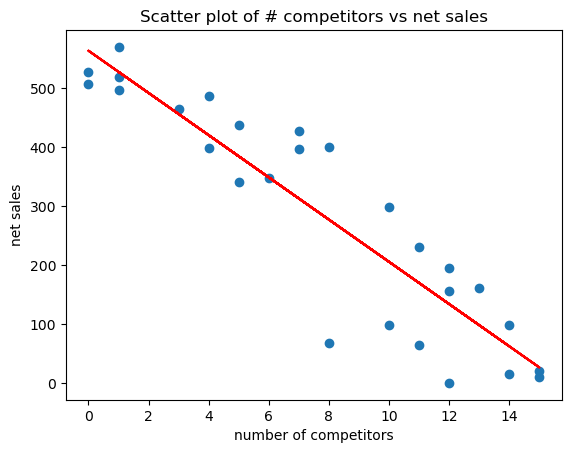

In [14]:
# X1 and X6 OLS regression summary
y = df['X1']
X = df['X6']

X = sm.add_constant(X)

lr_model = sm.OLS(y, X).fit()
print(lr_model.summary())

print("Linear Reg: " + str(lr_model.params['X6']) + "*x +" + str(lr_model.params['const']))

# Scatter plot
plt.scatter(df['X6'], df['X1'])
plt.xlabel('number of competitors')
plt.ylabel('net sales')
plt.title('Scatter plot of # competitors vs net sales')

# Regression Line
y_pred = lr_model.predict(X)
plt.plot(df['X6'], y_pred, color='red') 
plt.show() 

                            OLS Regression Results                            
Dep. Variable:                     X1   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     126.9
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           2.75e-11
Time:                        12:17:25   Log-Likelihood:                -155.40
No. Observations:                  27   AIC:                             314.8
Df Residuals:                      25   BIC:                             317.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -90.1496     36.770     -2.452      0.0

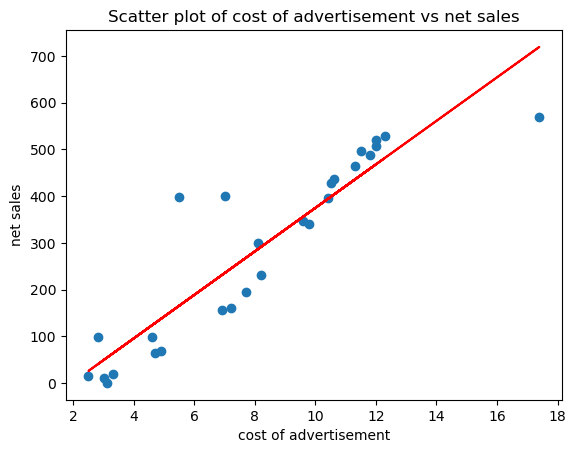

In [16]:
# X1 and X5 OLS regression summary
y = df['X1']
X = df['X4']

X = sm.add_constant(X)

lr_model = sm.OLS(y, X).fit()
print(lr_model.summary())

print("Linear Reg: " + str(lr_model.params['X4']) + "*x +" + str(lr_model.params['const']))

# Scatter plot
plt.scatter(df['X4'], df['X1'])
plt.xlabel('cost of advertisement')
plt.ylabel('net sales')
plt.title('Scatter plot of cost of advertisement vs net sales')

# Regression line 
y_pred = lr_model.predict(X)
plt.plot(df['X4'], y_pred, color='red')  
plt.show() 

                            OLS Regression Results                            
Dep. Variable:                     X1   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     115.2
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           4.95e-13
Time:                        12:20:43   Log-Likelihood:                -147.89
No. Observations:                  27   AIC:                             301.8
Df Residuals:                      24   BIC:                             305.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        228.7404     80.592      2.838      0.0

/var/folders/3h/c2t_l2y13hb72x3mf8g1xf6w0000gn/T/ipykernel_16887/1779372511.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Z_axis = lr_model_ads_comp.params[0] + lr_model_ads_comp.params[1] * X_axis + lr_model_ads_comp.params[2] * Y_axis


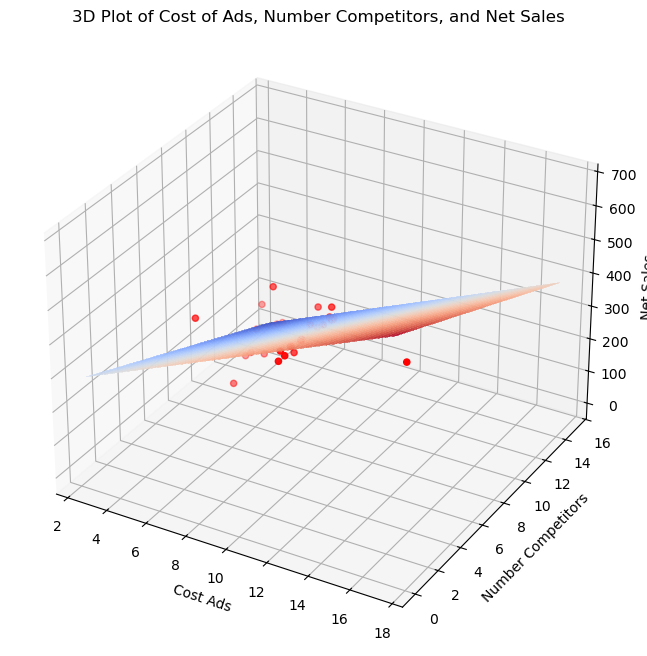

In [18]:
# Finding MLR given both X5, X6 on X1
y = df['X1']
X = df[['X4', 'X6']]
X = sm.add_constant(X)
lr_model_ads_comp = sm.OLS(y, X).fit()

# Printing summary stats of the model
print(lr_model_ads_comp.summary())
# Printing coefficients of the model
print(lr_model_ads_comp.params)

# Generating 3D model with features being used in correlation to target variable
X_axis, Y_axis = np.meshgrid(np.linspace(X.X4.min(), X.X4.max(), 100), 
                             np.linspace(X.X6.min(), X.X6.max(), 100))

# c + b_1 * X5 + b_2 * X6
Z_axis = lr_model_ads_comp.params[0] + lr_model_ads_comp.params[1] * X_axis + lr_model_ads_comp.params[2] * Y_axis

# Initializing 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Ploting the surface based on 'X5, X6, on predicted X1
ax.plot_surface(X_axis, Y_axis, Z_axis, cmap='coolwarm', alpha=0.5, linewidth=0, antialiased=False)

# Scatter plots on actual X5, X6, AND X1
ax.scatter(df['X4'], df['X6'], df['X1'], color='red')

# Labeling axes
ax.set_xlabel('Cost Ads')
ax.set_ylabel('Number Competitors')
ax.set_zlabel('Net Sales')

# Plot title and visualization
ax.set_title('3D Plot of Cost of Ads, Number Competitors, and Net Sales')
plt.show()

In [20]:
# Finding MLR given all 5 features
y = df['X1']
X = df.drop(['X1'], axis=1)
X = sm.add_constant(X)
# Fitting the linear regression model using OLS method
lr_model_all = sm.OLS(y, X).fit()

# Printing summary stats of the model
print(lr_model_all.summary())
# Print coefficients of the model
print(lr_model_all.params)

y_pred = lr_model_all.predict(X)
print(y_pred)

                            OLS Regression Results                            
Dep. Variable:                     X1   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     611.6
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           5.40e-22
Time:                        12:21:30   Log-Likelihood:                -112.43
No. Observations:                  27   AIC:                             236.9
Df Residuals:                      21   BIC:                             244.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.8594     30.150     -0.626      0.5